### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

df = pd.read_csv("../data/USA_Housing.csv")
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...  
1     188 Johnson Views Suite 079\r\nLake Kathleen, ...  
2     9127 Elizabeth Stravenue\r\nDanieltown, WI 064...  
3                           USS Barnett\r\nFPO AP 44820  
4                          USNS Raymond\r\nFPO AE 09386  
...                                                 ...  
4995                 USNS Williams\r\nFPO AP 30153-7653  
4996            PSC 9258, Box 8489\r\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\r\nJoshualand, VA ...  
4998                        USS Wallace\r\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\r\nEast Holly, NV...  

[5000 rows x 7 columns]

In [28]:
list_columnas = df._get_numeric_data().columns.tolist()[:-1]
list_columnas


['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split



### Todos juntos sin gráfico

El score de Avg. Area Income es 0.41104638114816794


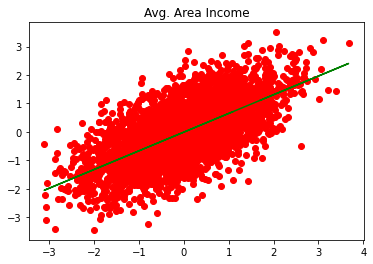

El score de Avg. Area House Age es 0.20567202707137688


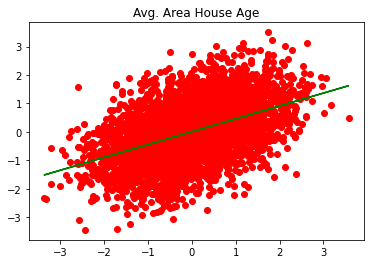

El score de Avg. Area Number of Rooms es 0.10646788740256585


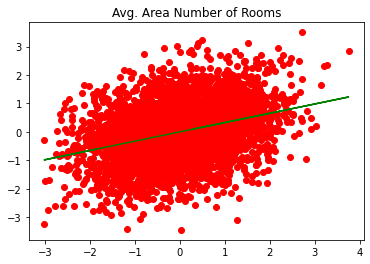

El score de Avg. Area Number of Bedrooms es 0.028262540599077846


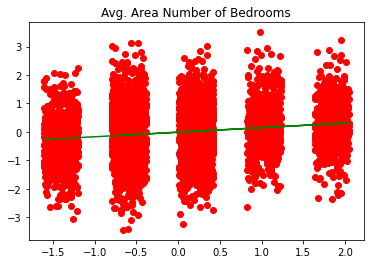

El score de Area Population es 0.1649031290415558


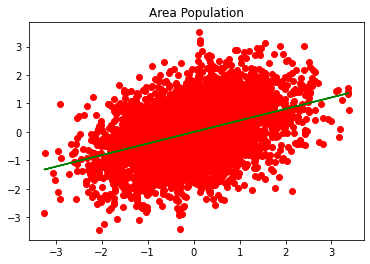

In [30]:
y = np.array(df['Price'])
y = y.reshape(-1, 1)



for columna in list_columnas:  
    
    X = np.array(df[[columna]])
    #X = X.reshape(-1, 1)
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    y = sc_y.fit_transform(y)

       
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    X_train = X_train.reshape(-1, 1)
    svr_rbf = SVR(kernel='linear')
    model = svr_rbf.fit(X_train, y_train.ravel())
    y_prediction = model.predict(X_train)
    model_score= model.score(X_train, y_train)
    
    
    print(f'El score de {columna} es {model_score}')
    X_to_show, y_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_to_show, y_to_show, color='red')
    #plt.scatter(X_to_show, y_prediction, color='green', alpha=0.3)
    plt.plot(X_train, y_prediction, color='green')
    plt.title(columna)
    plt.show()
  

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 


In [6]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

df = pd.read_csv("../data/USA_Housing.csv")


In [7]:

df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype(int)


In [8]:
X.shape

(5000, 5)

In [9]:
df1 = df.drop(['Avg. Area Number of Bedrooms', 'Address'], axis=1)
list_columnas = df1._get_numeric_data().columns.tolist()
list_columnas


['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Area Population',
 'Price']

Para este modelo:
El score de entrenamiento de Avg. Area Income:, es 0.30725 
El accuracy_score de Avg. Area Income es: 0.275 
El score de entrenamiento de Avg. Area Income:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Avg. Area Income:, [[  0 164   2   0   0]
 [  0 271   2   0   0]
 [  0 295   4   0   0]
 [  0 127   4   0   0]
 [  0 129   2   0   0]]


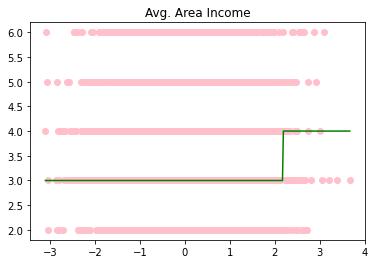

Para este modelo:
El score de entrenamiento de Avg. Area House Age:, es 0.30875 
El accuracy_score de Avg. Area House Age es: 0.273 
El score de entrenamiento de Avg. Area House Age:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Avg. Area House Age:, [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]


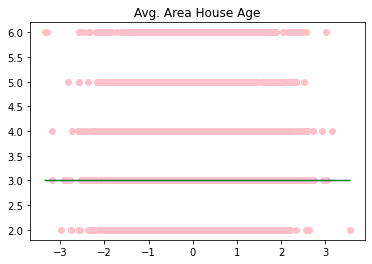

Para este modelo:
El score de entrenamiento de Avg. Area Number of Rooms:, es 0.30025 
El accuracy_score de Avg. Area Number of Rooms es: 0.272 
El score de entrenamiento de Avg. Area Number of Rooms:es [3 3 3 ... 3 3 2] 
La matriz de confusion de Avg. Area Number of Rooms:, [[ 33 133   0   0   0]
 [ 40 221   0   0  12]
 [ 45 240   0   0  14]
 [  0 112   0   0  19]
 [  0 113   0   0  18]]


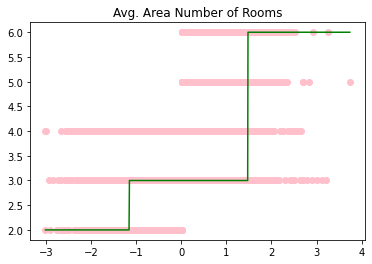

Para este modelo:
El score de entrenamiento de Area Population:, es 0.30875 
El accuracy_score de Area Population es: 0.273 
El score de entrenamiento de Area Population:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Area Population:, [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]


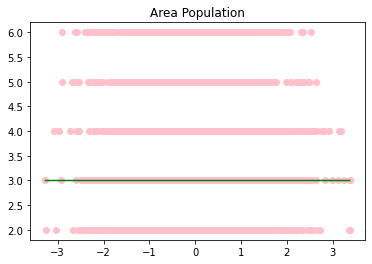

Para este modelo:
El score de entrenamiento de Price:, es 0.30875 
El accuracy_score de Price es: 0.273 
El score de entrenamiento de Price:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Price:, [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]


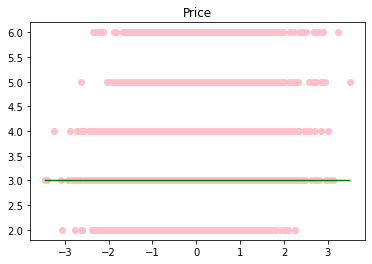

In [16]:
#Import svm model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = df['Avg. Area Number of Bedrooms']


for columna in list_columnas:  
    
    
    X = df1[[columna]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    #X_train = X_train.reshape(-1, 1)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    C = 1
    clf = svm.LinearSVC(C=C)
    clf.fit(X_train, y_train.ravel())

    y_prediction = clf.predict(X_test)
    y_predic = clf.predict(X_train)

    print(f'Para este modelo:\nEl score de entrenamiento de {columna}:, es {clf.score(X_train, y_train)} \nEl accuracy_score de {columna} es: {accuracy_score(y_test, y_prediction)} \nEl score del modelo de {columna}es : {clf.score(X_test, y_test)}  \nLa matriz de confusion de {columna}:, {confusion_matrix(y_test,y_prediction)}')
     
    plt.scatter(X_train, y_train, color='pink')
    X_to_show, y_to_show = zip(*sorted(zip(X_train, y_predic)))
    plt.plot(X_to_show, y_to_show, color='green')
    plt.title(columna)
    plt.show()


### Estandarizando variables

Para este modelo:
El score de entrenamiento de Avg. Area Income:, es 0.30725 
El accuracy_score de Avg. Area Income es: 0.275 
El score de entrenamiento de Avg. Area Income:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Avg. Area Income:, [[  0 164   2   0   0]
 [  0 271   2   0   0]
 [  0 295   4   0   0]
 [  0 127   4   0   0]
 [  0 129   2   0   0]]


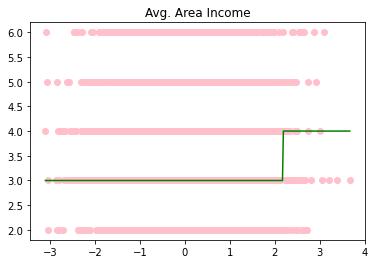

Para este modelo:
El score de entrenamiento de Avg. Area House Age:, es 0.30875 
El accuracy_score de Avg. Area House Age es: 0.273 
El score de entrenamiento de Avg. Area House Age:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Avg. Area House Age:, [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]


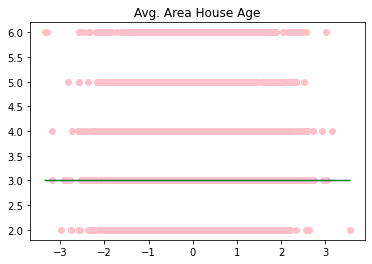

Para este modelo:
El score de entrenamiento de Avg. Area Number of Rooms:, es 0.30025 
El accuracy_score de Avg. Area Number of Rooms es: 0.272 
El score de entrenamiento de Avg. Area Number of Rooms:es [3 3 3 ... 3 3 2] 
La matriz de confusion de Avg. Area Number of Rooms:, [[ 33 133   0   0   0]
 [ 40 221   0   0  12]
 [ 45 240   0   0  14]
 [  0 112   0   0  19]
 [  0 113   0   0  18]]


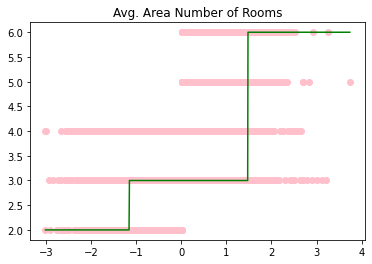

Para este modelo:
El score de entrenamiento de Area Population:, es 0.30875 
El accuracy_score de Area Population es: 0.273 
El score de entrenamiento de Area Population:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Area Population:, [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]


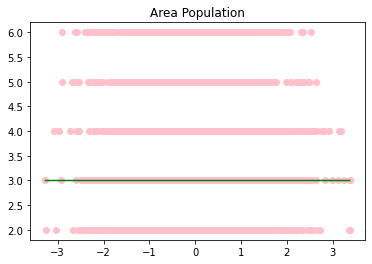

Para este modelo:
El score de entrenamiento de Price:, es 0.30875 
El accuracy_score de Price es: 0.273 
El score de entrenamiento de Price:es [3 3 3 ... 3 3 3] 
La matriz de confusion de Price:, [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]


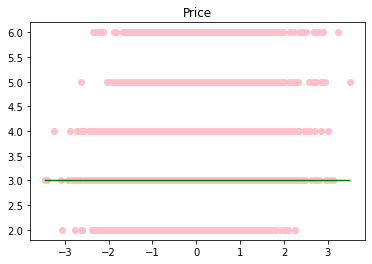

In [17]:
#Import svm model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = np.array(df['Avg. Area Number of Bedrooms'])
y = y.reshape(-1, 1)
#y = df['Avg. Area Number of Bedrooms']


for columna in list_columnas:  
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    X = np.array(df1[[columna]])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    X_train = X_train.reshape(-1, 1)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    C = 1
    clf = svm.LinearSVC(C=C)
    clf.fit(X_train, y_train.ravel())

    y_prediction = clf.predict(X_test)
    y_predic = clf.predict(X_train)

    print(f'Para este modelo:\nEl score de entrenamiento de {columna}:, es {clf.score(X_train, y_train)} \nEl accuracy_score de {columna} es: {accuracy_score(y_test, y_prediction)} \nEl score del modelo es: {clf.score(X_test, y_test)} \nLa matriz de confusion de {columna}:, {confusion_matrix(y_test,y_prediction)}')
     
    plt.scatter(X_train, y_train, color='pink')
    X_to_show, y_to_show = zip(*sorted(zip(X_train, y_predic)))
    plt.plot(X_to_show, y_to_show, color='green')
    plt.title(columna)
    plt.show()




### Usando todas las demás columnas a la vez ¿hace aumentar el score? ¿por qué?

In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

df = pd.read_csv("../data/USA_Housing.csv")

In [11]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype(int)

In [3]:
X = df.drop(['Avg. Area Number of Bedrooms', 'Address'], axis=1)
y = df['Avg. Area Number of Bedrooms']
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


In [18]:
#Import svm model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C = 1
clf = svm.LinearSVC(C=C)
clf.fit(X_train, y_train.ravel())

y_prediction = clf.predict(X_test)
y_predic = clf.predict(X_train)

print(f'Para este modelo:\nEl score de entrenamiento es: {clf.score(X_train, y_train)} \nEl accuracy_score es: {accuracy_score(y_test, y_prediction)} \nEl score del modelo es: {clf.score(X_test, y_test)} \nLa matriz de confusion es: {confusion_matrix(y_test,y_prediction)}')
     
#plt.scatter(X_train, y_train, color='pink')
#X_to_show, y_to_show = zip(*sorted(zip(X_train, y_predic)))
#plt.plot(X_to_show, y_to_show, color='green')
#plt.show()

#X_to_show, y_to_show = zip(*sorted(zip(X_train, y_train)))
#plt.scatter(X_to_show, y_to_show, color='red')
#plt.plot(X_train, y_prediction, color='green')
#plt.show()

Para este modelo:
El score de entrenamiento es: 0.30875 
El accuracy_score es: 0.273 
El score de entrenamiento es: [3 3 3 ... 3 3 3] 
La matriz de confusion es: [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]


In [ ]:
## en el ejercicio de house_svr_svm.ipynb probad en el apartado de SVC este: SVC(kernel= "rbf", C = 100, gamma = 0.1, random_state = 100).  Con la columna Avg. Area Income, se ha visto un score de 0.98 y queremos saber si alguien también le pasa.

In [12]:
X = np.array(df['Avg. Area Income'])
X = X.reshape(-1, 1)
y = np.array(df['Avg. Area Number of Bedrooms'])
y = y.reshape(-1, 1)
print(X.shape)
print(y.shape)

(5000, 1)
(5000, 1)


In [17]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#C = 1
clf = SVC(kernel= "rbf", C = 100, gamma = 0.1, random_state = 100)
clf.fit(X_train, y_train.ravel())

y_prediction = clf.predict(X_test)
y_predic = clf.predict(X_train)

print(f'Para este modelo:\nEl score de entrenamiento es: {clf.score(X_train, y_train)} \nEl accuracy_score es: {accuracy_score(y_test, y_prediction)} \nEl score del modelo es: {clf.score(X_test, y_test)} \nLa matriz de confusion es: {confusion_matrix(y_test,y_prediction)}')

Para este modelo:
El score de entrenamiento es: 0.30875 
El accuracy_score es: 0.273 
El score del modelo es: 0.273 
La matriz de confusion es: [[  0 166   0   0   0]
 [  0 273   0   0   0]
 [  0 299   0   0   0]
 [  0 131   0   0   0]
 [  0 131   0   0   0]]
